In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def rgbtohsi(rgb_lwpImg):
    rows = int(rgb_lwpImg.shape[0])
    cols = int(rgb_lwpImg.shape[1])
    b, g, r = cv2.split(rgb_lwpImg)
    # 归一化到[0,1]
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0
    hsi_lwpImg = rgb_lwpImg.copy()
    for i in range(rows):
        for j in range(cols):
            num = 0.5 * ((r[i, j] - g[i, j]) + (r[i, j] - b[i, j]))
            den = np.sqrt((r[i, j] - g[i, j]) ** 2 + (r[i, j] - b[i, j]) * (g[i, j] - b[i, j]))
            theta = float(np.arccos(num / den))

            if den == 0:
                H = 0
            elif b[i, j] <= g[i, j]:
                H = theta
            else:
                H = 2 * 3.14169265 - theta

            min_RGB = min(min(b[i, j], g[i, j]), r[i, j])
            sum = b[i, j] + g[i, j] + r[i, j]
            if sum == 0:
                S = 0
            else:
                S = 1 - 3 * min_RGB / sum

            H = H / (2 * 3.14159265)
            I = sum / 3.0
            # 输出HSI图像，扩充到255以方便显示，一般H分量在[0,2pi]之间，S和I在[0,1]之间
            hsi_lwpImg[i, j, 0] = H * 255
            hsi_lwpImg[i, j, 1] = S * 255
            hsi_lwpImg[i, j, 2] = I * 255
    return hsi_lwpImg

/var/folders/dp/wdk87p0d3ml1ysm634x3wlf80000gn/T/ipykernel_84921/1053910732.py:14: RuntimeWarning: invalid value encountered in double_scalars
  theta = float(np.arccos(num / den))


(-0.5, 5743.5, 3229.5, -0.5)

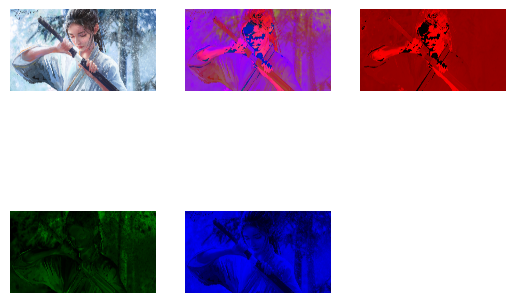

In [6]:
rgb_lwpImg = cv2.imread("./img/SnowGirl.jpg")
hsi_lwpImg = rgbtohsi(rgb_lwpImg)

img_H = hsi_lwpImg * [1, 0, 0]
img_S = hsi_lwpImg * [0, 1, 0]
img_I = hsi_lwpImg * [0, 0, 1]

plt.subplot(2, 3, 1)
plt.imshow(rgb_lwpImg[...,::-1])
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(hsi_lwpImg)
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(img_H)
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(img_S)
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(img_I)
plt.axis('off')